In [1]:
function h(a::Float64)
    println("You have called the method for handling Float64s")
end
function h(a::Int64)
    println("You have called the method for handling Int64s")
end

h(1.0)

importall Base.Operators # Gives access to + so that we can add a method
+(x::Integer, y::String) = x + parse(Int, y)

+(100, "100")

100 + "100"

You have called the method for handling Float64s


200

In [3]:
using Distributions

mutable struct AR1
    a
    b
    σ
    ϕ
end

struct AR{T <: Real}
    a :: T
    b :: T
    σ :: T
    ϕ :: Distribution
end

m = AR1(0.9,1,1,Beta(5,5))

m.a

m.b

m.σ

m.ϕ


Distributions.Beta{Float64}(α=5.0, β=5.0)

In [4]:
function simul(m::AR, n::Integer, x0::Real)
    x = Array{Float64}(n)
    x[1] = x0
    for i = 1:(n-1)
        x[i+1] = m.a * x[i] + m.b + m.σ * rand(m.ϕ)
    end
    return x
end

l = AR(0.9,1.0,1.0,Beta(5,5))

simul(l, 10, 0)

10-element Array{Float64,1}:
 0.0    
 1.3602 
 2.75337
 3.82961
 5.06978
 5.8902 
 7.01673
 7.89595
 8.62954
 9.33484

In [5]:
m = AR(0.9, 1.0, 1.0, Beta(5, 5))

AR{Float64}(0.9, 1.0, 1.0, Distributions.Beta{Float64}(α=5.0, β=5.0))

In [6]:
X = simul(m, 100, 0.0);

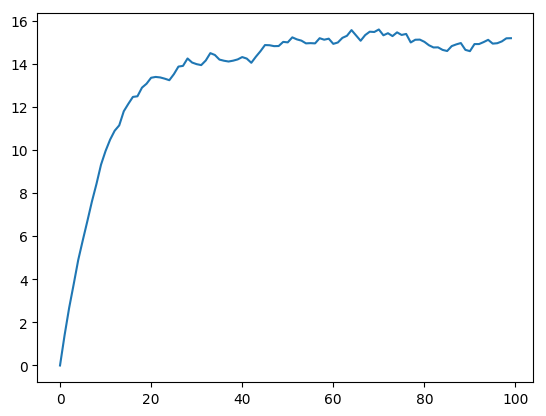

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002CBE85C0>

In [7]:
using PyPlot
plot(X)